# **Pipeline 10 Modeling**

In [5]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
from sklearn import metrics 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

In [33]:
# import required packages for splitting data
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

# import required packages for evaluating models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

In [6]:
# Importing Excel file, calling the DataFrame comp_df
df = pd.read_csv('Final10', header=0, index_col=0)
# Checking import 
df.head(5)

,X1,X12_ABS,X13_ABS,X14_ABS,X15_ABS,X16_ABS,X17_ABS,X2,X3,X4,...,X15_M,X16_M,X17_M,X18_BI,X19_BI,X20_BI,X21_BI,X22_BI,X23_BI,Y
0,-1.869598,-0.758386,-0.785153,-1.088616,-1.579920,-1.541281,-1.483532,2,2,1,...,3,2,1,0,1,0,0,0,0,1
1,0.034263,-0.866772,-0.935035,-0.794573,-0.699341,-0.636680,-0.606347,2,2,2,...,3,2,1,0,1,1,1,0,1,1
2,-0.271418,0.116536,-0.233725,-0.216424,-0.139167,-0.067265,-0.007117,2,2,2,...,3,2,1,1,1,1,1,1,1,0
3,-0.895980,0.423406,0.476861,0.528327,0.227939,0.296254,0.345181,2,2,1,...,3,2,1,1,1,1,1,1,1,0
4,-0.895980,-0.482617,-0.597292,0.313576,0.054974,0.059507,0.098518,1,2,1,...,3,2,1,1,1,1,1,1,1,0


# **Splitting and Resampling Data**

In [7]:
X = df.iloc[:,:-1] # Features
y = df.Y # Target variable

In [8]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=2019)

In [9]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=2019)
X_train_resample, y_train_resample = ros.fit_resample(X_train, y_train)

# **Logistic Regression**

In [28]:
cols = df.columns.values
print(cols)

['X1' 'X12_ABS' 'X13_ABS' 'X14_ABS' 'X15_ABS' 'X16_ABS' 'X17_ABS' 'X2'
 'X3' 'X4' 'X5_Bins' 'X6_BI' 'X7_BI' 'X8_BI' 'X9_BI' 'X10_BI' 'X11_BI'
 'X12_BI' 'X13_BI' 'X14_BI' 'X15_BI' 'X16_BI' 'X17_BI' 'X12_M' 'X13_M'
 'X14_M' 'X15_M' 'X16_M' 'X17_M' 'X18_BI' 'X19_BI' 'X20_BI' 'X21_BI'
 'X22_BI' 'X23_BI' 'Y']


In [29]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(solver='liblinear')

# fit the model with data
logreg = logreg.fit(X_train_resample,y_train_resample)

#
y_pred=logreg.predict(X_test)

In [30]:
# import the metrics class
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[4734, 1172],
       [ 608,  986]])

Text(0.5, 257.44, 'Predicted label')

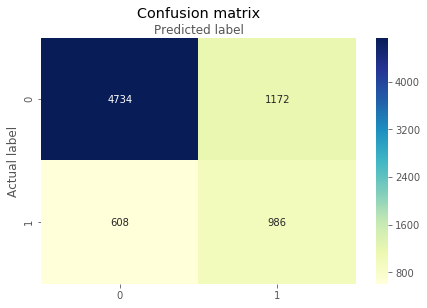

In [31]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [32]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1_Score:",f1_score(y_test, y_pred, average='weighted'))
print("AUC:",roc_auc_score(y_test, y_pred))

Accuracy: 0.7626666666666667
F1_Score: 0.7745544063870851
AUC: 0.7100636870145879


# **Decision Tree**

In [17]:
# Import Decision Tree Classifier  
from sklearn.tree import DecisionTreeClassifier 

# Create Decision Tree Classifier Object 
clf = DecisionTreeClassifier()
clf = clf.fit(X_train_resample, y_train_resample)

# Predict the response for test dataset 
y_pred = clf.predict(X_test)

# Model Accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

Accuracy: 0.7364
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      5906
           1       0.39      0.41      0.40      1594

   micro avg       0.74      0.74      0.74      7500
   macro avg       0.61      0.62      0.62      7500
weighted avg       0.74      0.74      0.74      7500

[[4866 1040]
 [ 937  657]]


In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1_Score:",f1_score(y_test, y_pred, average='weighted'))
print("AUC:",roc_auc_score(y_test, y_pred))

# **Feature Importance**

In [20]:
feature_importance = pd.Series(clf.feature_importances_, index=df.iloc[:,:-1].columns).sort_values(ascending=False)
feature_importance

X6_BI      0.157478
X12_ABS    0.116951
X17_ABS    0.097452
X13_ABS    0.096210
X14_ABS    0.089541
X15_ABS    0.086652
X1         0.085307
X16_ABS    0.080866
X3         0.030904
X5_Bins    0.024689
X4         0.019368
X8_BI      0.016282
X2         0.014836
X23_BI     0.013217
X12_BI     0.012859
X21_BI     0.008678
X10_BI     0.006571
X22_BI     0.006125
X9_BI      0.006112
X20_BI     0.005274
X11_BI     0.005239
X18_BI     0.004863
X17_BI     0.003491
X7_BI      0.003341
X15_BI     0.002425
X19_BI     0.002419
X16_BI     0.001504
X13_BI     0.000691
X14_BI     0.000657
X13_M      0.000000
X14_M      0.000000
X15_M      0.000000
X16_M      0.000000
X17_M      0.000000
X12_M      0.000000
dtype: float64

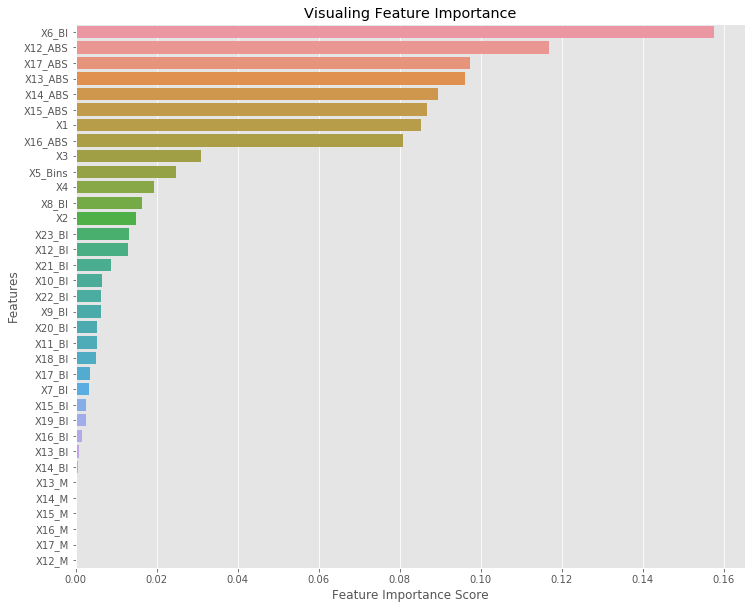

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
plt.figure(figsize=(12,10))

sns.barplot(x=feature_importance, y=feature_importance.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualing Feature Importance")

plt.show()

# **SVM Gaussian Kernel**

In [22]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='rbf', gamma='auto')  #Kernel=rbf, non-linearly separable data
svclassifier = svclassifier.fit(X_train_resample, y_train_resample) 

In [23]:
y_pred = svclassifier.predict(X_test)  

In [24]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[4833 1073]
 [ 604  990]]
              precision    recall  f1-score   support

           0       0.89      0.82      0.85      5906
           1       0.48      0.62      0.54      1594

   micro avg       0.78      0.78      0.78      7500
   macro avg       0.68      0.72      0.70      7500
weighted avg       0.80      0.78      0.79      7500



In [27]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1_Score:",f1_score(y_test, y_pred, average='weighted'))
print("AUC:",roc_auc_score(y_test, y_pred))

Accuracy: 0.7764
F1_Score: 0.7861154323927396
AUC: 0.7196996993041549


# **K-Neighbors Classifier**

In [16]:
from sklearn.neighbors import KNeighborsClassifier
kneigh = KNeighborsClassifier()
kneigh = kneigh.fit(X_train_resample, y_train_resample)
y_pred = kneigh.predict(X_test)

In [17]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1_Score:",f1_score(y_test, y_pred, average='weighted'))
print("AUC:",roc_auc_score(y_test, y_pred))

Accuracy: 0.6664
F1_Score: 0.6940704830304599
AUC: 0.650313506329399


# **ADA Classifier**

In [18]:
from sklearn.ensemble import AdaBoostClassifier
ADA = AdaBoostClassifier(n_estimators=70, random_state=2019)
kneigh = ADA.fit(X_train_resample, y_train_resample)
y_pred = ADA.predict(X_test)

In [19]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1_Score:",f1_score(y_test, y_pred, average='weighted'))
print("AUC:",roc_auc_score(y_test, y_pred))

Accuracy: 0.7622666666666666
F1_Score: 0.7742218312582383
AUC: 0.7098097080101855


# **Cross Validation for all Models**

In [20]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=2019)
X_resample, y_resample = ros.fit_resample(X, y)

In [21]:
# cross_valid_ex.py

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

features, targets = X_resample, y_resample

models = []
models.append(('LogisticRegression', LogisticRegression()))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
#models.append(('SVC', SVC()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('AdaClassifier', AdaBoostClassifier()))


# KFold with 'stratify' option
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=2019)
for name, model in models:
    score = cross_val_score(model, features, targets, cv=cv)
    print("Model:{0}, Score: mean={1:0.5f}, var={2:0.5f}".format(
        name,
        score.mean(),
        score.var()
        )
    )

/home/jupyter-jhoffmann/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyter-jhoffmann/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyter-jhoffmann/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyter-jhoffmann/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyter-jhoffmann/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: 

Model:LogisticRegression, Score: mean=0.70495, var=0.00004
Model:KNeighborsClassifier, Score: mean=0.76691, var=0.00006
Model:DecisionTreeClassifier, Score: mean=0.88906, var=0.00011
Model:AdaClassifier, Score: mean=0.70748, var=0.00005
